In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('amazon_sales_data 2025.csv')

# 1. Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             Price    Quantity  Total Sales
count   250.000000  250.000000   250.000000
mean    343.580000    2.856000   975.380000
std     380.635808    1.429489  1252.112254
min      15.000000    1.000000    15.000000
25%      40.000000    2.000000   100.000000
50%     150.000000    3.000000   400.000000
75%     600.000000    4.000000  1500.000000
max    1200.000000    5.000000  6000.000000


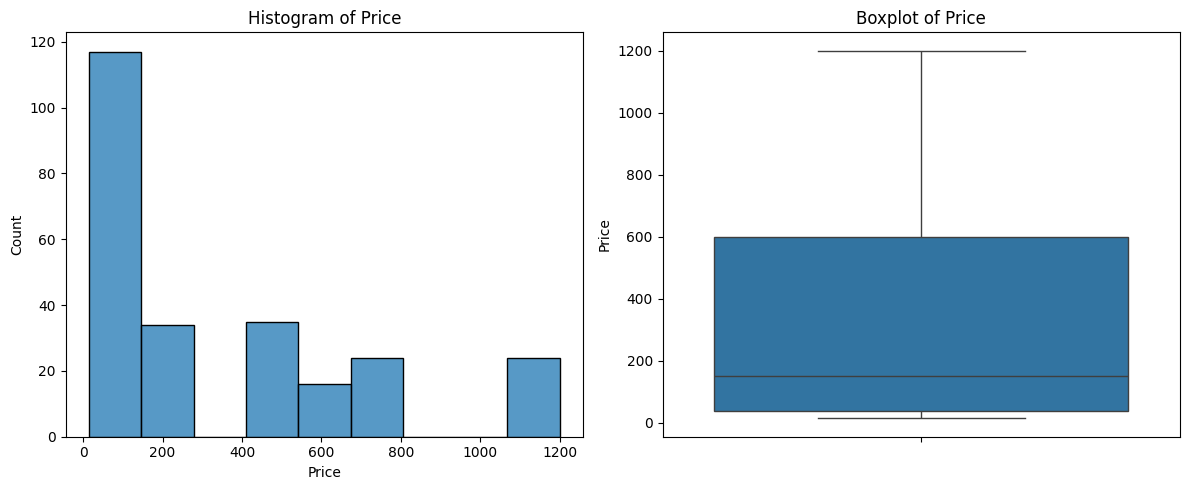

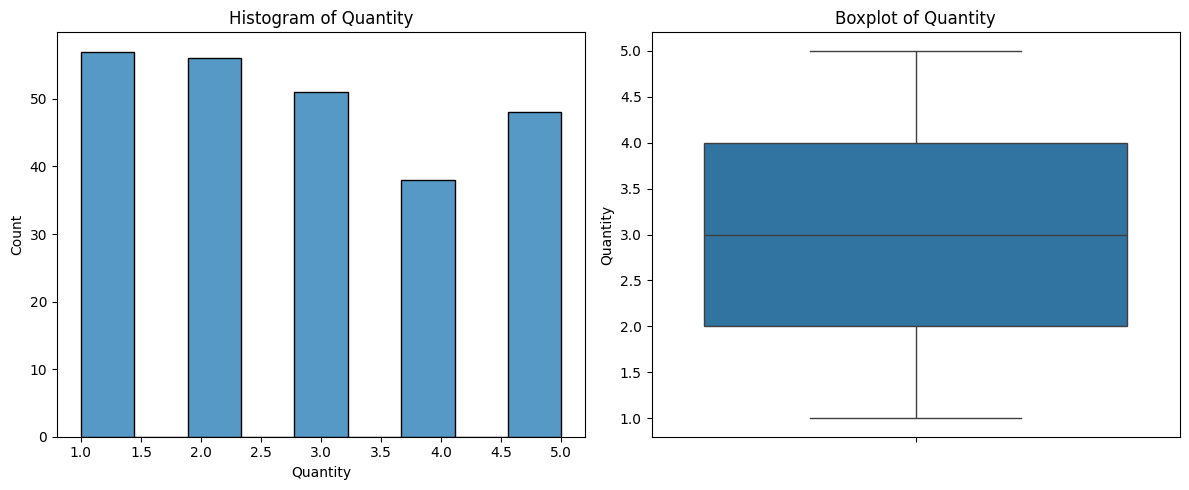

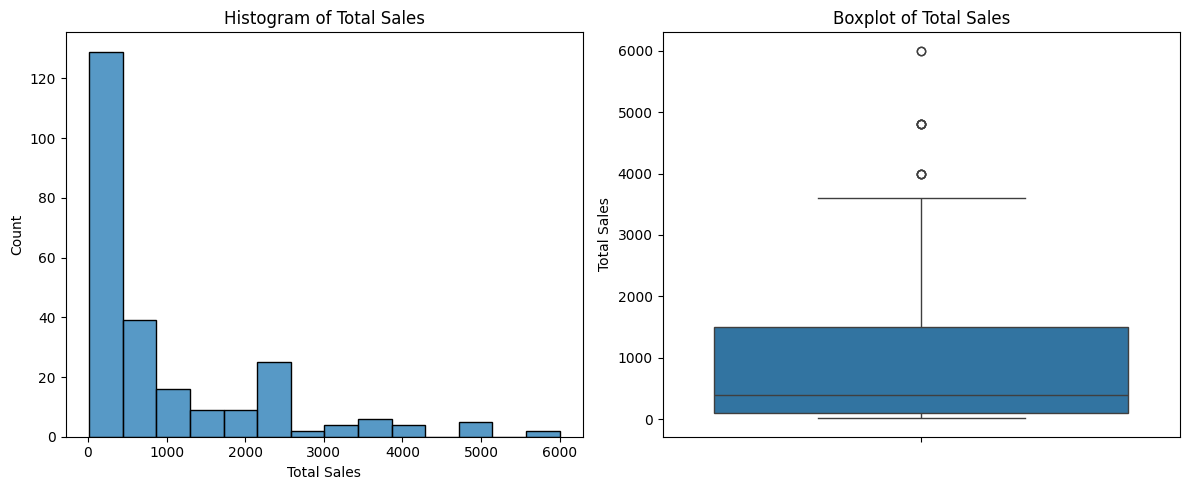

In [16]:
# 2. Histograms and Boxplots
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numeric_columns:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column)
    plt.title(f'Histogram of {column}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()

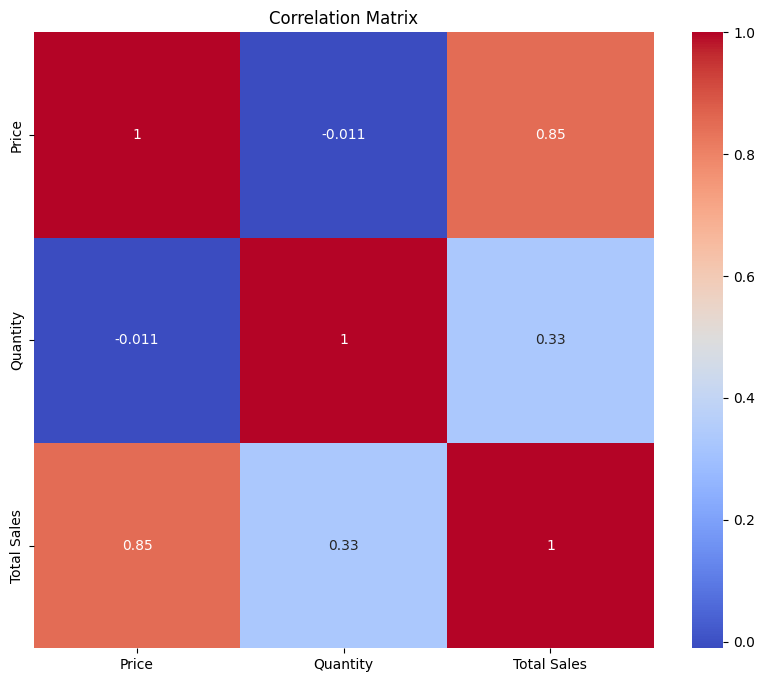

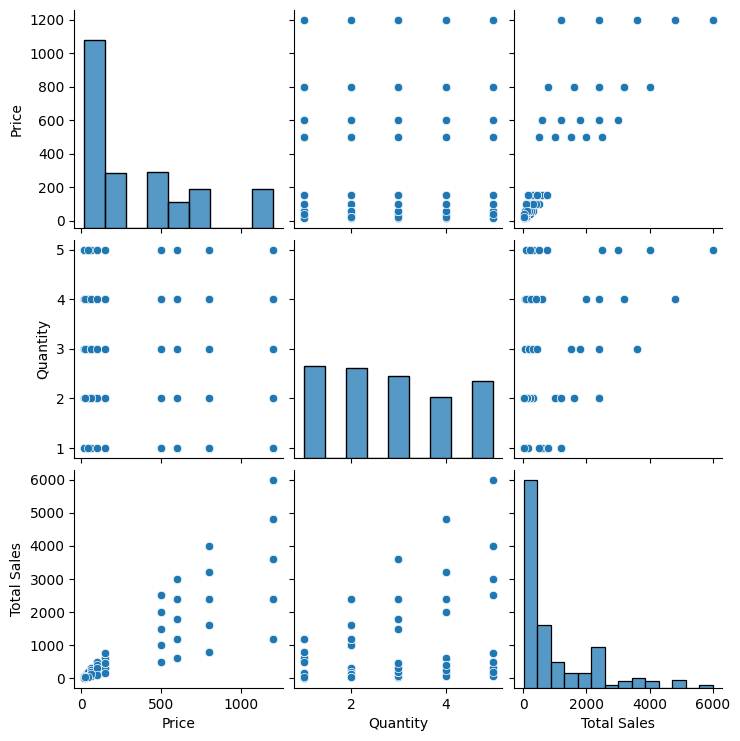

In [17]:
# 3. Correlation Matrix and Pairplot
# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(df.select_dtypes(include=['int64', 'float64']))
plt.show()


In [18]:
# 4. Pattern Analysis
for column in numeric_columns:
    print(f"\nAnalysis for {column}:")
    print(f"Skewness: {df[column].skew():.2f}")
    print(f"Number of outliers: {len(df[df[column] > df[column].mean() + 2*df[column].std()])}")


Analysis for Price:
Skewness: 1.06
Number of outliers: 24

Analysis for Quantity:
Skewness: 0.18
Number of outliers: 0

Analysis for Total Sales:
Skewness: 1.69
Number of outliers: 17


In [19]:
# 5. Basic Feature Inferences
print("\nDataset Overview:")
print(f"Total records: {len(df)}")
print(f"Total features: {len(df.columns)}")
print("\nMissing values:")
print(df.isnull().sum())


Dataset Overview:
Total records: 250
Total features: 11

Missing values:
Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64
